## Group 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots directly in the notebook
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('customer_orders_dirty.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\n" + "="*50 + "\n")

# Display the first few rows
print("First 5 rows:")
print(df.head())
print("\n" + "="*50 + "\n")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print("\n" + "="*50 + "\n")

# Check unique values in the 'Country' column to see inconsistencies
print("Unique values in 'Country' column:")
print(df['Country'].unique())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          2700 non-null   object 
 1   Customer Name     2700 non-null   object 
 2   Order Date        2700 non-null   object 
 3   Product Category  2700 non-null   object 
 4   Quantity          2700 non-null   int64  
 5   Price             2700 non-null   float64
 6   Total Amount      2564 non-null   float64
 7   Country           2700 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 168.9+ KB
None


First 5 rows:
   Order ID  Customer Name           Order Date Product Category  Quantity  \
0  ORD11339  Customer_1339  2023-02-25 19:00:00           Sports         2   
1  ORD11222  Customer_1222  2023-02-20 22:00:00             Home         4   
2  ORD11106  Customer_1106  2023-02-16 02:00:00      Electronics         8   
3  ORD10812  

In [3]:
# Fill missing values in 'Total Amount' with the mean of the column
df['Total Amount'] = df['Total Amount'].fillna(df['Total Amount'].mean())

# Verify no more missing values
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
Order ID            0
Customer Name       0
Order Date          0
Product Category    0
Quantity            0
Price               0
Total Amount        0
Country             0
dtype: int64


In [4]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify duplicates are removed
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")
print(f"Shape of dataframe after removing duplicates: {df.shape}")

Number of duplicate rows after cleaning: 0
Shape of dataframe after removing duplicates: (2694, 8)


In [5]:
# Create a mapping dictionary for country names
country_mapping = {
    'U.S.A.': 'United States',
    'usa': 'United States',
    'UK': 'United Kingdom',
    'U.K': 'United Kingdom',
    'fr': 'France',
    'ger': 'Germany',
    'canada': 'Canada'
}

# Apply the mapping to the 'Country' column
df['Country'] = df['Country'].replace(country_mapping)

# Verify the standardization
print("Unique values in 'Country' column after standardization:")
print(df['Country'].unique())

Unique values in 'Country' column after standardization:
['United States' 'Canada' 'France' 'United Kingdom' 'U.K.' 'Germany']


In [10]:
numeric_cols = ['Order ID', 'Quantity', 'Price', 'Total Amount']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [11]:
print("\nBasic Statistics:")
print(f"Total orders: {len(df)}")
print(f"Date range: {df['Order Date'].min().date()} to {df['Order Date'].max().date()}")
print(f"Total revenue: ${df['Total Amount'].sum():,.2f}")
print(f"Average order value: ${df['Total Amount'].mean():,.2f}")


Basic Statistics:
Total orders: 2694
Date range: 2023-01-01 to 2023-04-15
Total revenue: $3,379,682.40
Average order value: $1,254.52


In [6]:
# Calculate total revenue per category
revenue_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Save to CSV
revenue_by_category.to_csv('revenue_by_category.csv')

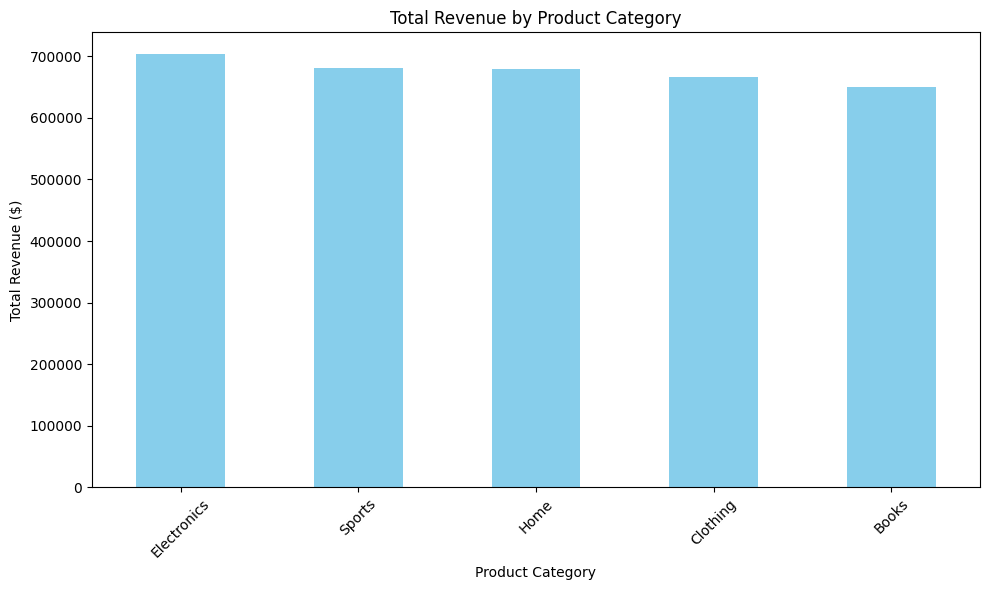

In [7]:
plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('revenue_by_category.png')
plt.show()

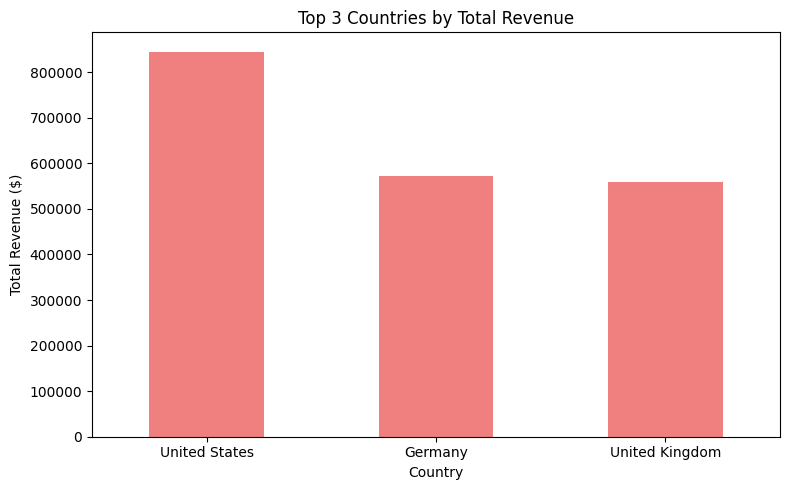

In [8]:
# Calculate total revenue per country
revenue_by_country = df.groupby('Country')['Total Amount'].sum().sort_values(ascending=False)

# Get top 3
top_3_countries = revenue_by_country.head(3)

# Save to CSV
top_3_countries.to_csv('top_3_countries_by_revenue.csv')

# Visualise
plt.figure(figsize=(8, 5))
top_3_countries.plot(kind='bar', color='lightcoral')
plt.title('Top 3 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('top_3_countries_by_revenue.png')
plt.show()

In [9]:
# Save the cleaned dataframe to a new CSV file
df.to_csv('customer_orders_cleaned.csv', index=False)
print("Cleaned dataset saved as 'customer_orders_cleaned.csv'")

Cleaned dataset saved as 'customer_orders_cleaned.csv'
